We try to understand how the stability bounds for EF depends on the parameters for the different force laws.

For the relaxation experiment
$$ \dot{r} = -2 F(r), r(0) = r_0$$
solved with EF 
$$ r_{n+1} = r_n - 2\Delta t F(r_n)$$
the bounds are (if $F(r_0) \leq 0$)

- If $\Delta t \leq \frac{r_0-s}{2 F(r_0)}$  the numerical solution is monotone
- If $\frac{r_0-s}{2 F(r_0)} \leq \Delta t \leq \frac{r_0-s}{F(r_0)}$ the numerical solution is stable, but exhibits overshooting

Now, $F_{cubic}(r) = \mu (r-r_A)^2 (r-s)$, $F_{GLS}(r) = \mu \log(1+r-s)$ and $F_{PWQ}(r) = ar^2-2br+c$ with $a= (\frac{\mu_A}{r_A^2} - \frac{\mu_R}{r_R^2})$, $b = (\frac{\mu_A}{r_A} - \frac{\mu_R}{r_R})$ and $c=\mu_A-\mu_R$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
plt.style.use('tableau-colorblind10')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6.75, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [2]:
r0 = 0.3
s = 1.0
rA = 1.5

## Cubic

Let's plot the bound as a function of $\mu$. (It is independent of all other parameters).

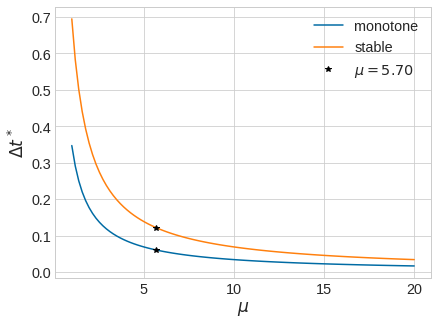

In [3]:
mu = np.linspace(1.0, 20, 100)
dtm = 1/(2*mu*(r0-rA)**2)
dts = 1/(mu*(r0-rA)**2)
plt.plot(mu, dtm, label='monotone')
plt.plot(mu, dts, label='stable')
plt.plot(5.70, 1/(2*5.70*(r0-rA)**2), '*', label='$\mu=5.70$', color='black')
plt.plot(5.70, 1/(5.70*(r0-rA)**2), '*',  color='black')

plt.legend()
plt.xlabel('$\mu$')
plt.ylabel('$\Delta t^*$')
plt.savefig('stability_bound_cubic.pdf', bbox_inches='tight')

In [4]:
1/(2*5.70*(r0-rA)**2)

0.060916179337231965

In [5]:
1/(5.70*(r0-rA)**2)

0.12183235867446393

## GLS

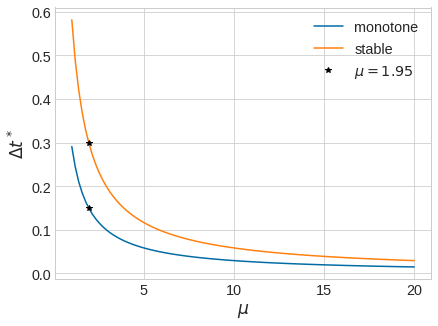

In [6]:
mu = np.linspace(1.0, 20, 100)
dtm = (r0-s)/(2*mu*np.log(1+r0-s))
dts = (r0-s)/(mu*np.log(1+r0-s))
plt.plot(mu, dtm, label='monotone')
plt.plot(mu, dts, label='stable')
plt.plot(1.95, (r0-s)/(2*1.95*np.log(1+r0-s)), '*', label='$\mu=1.95$', color='black')
plt.plot(1.95, (r0-s)/(1.95*np.log(1+r0-s)), '*', color='black')

plt.legend()
plt.xlabel('$\mu$')
plt.ylabel('$\Delta t^*$')
plt.savefig('stability_bound_GLS.pdf', bbox_inches='tight')

In [7]:
(r0-s)/(2*1.95*np.log(1+r0-s))

0.14907909783532725

In [8]:
 (r0-s)/(1.95*np.log(1+r0-s))

0.2981581956706545

The problem with the GLS is that for adhesion it's a totally different function so the stability bounds will be totally different. 

## PWQ

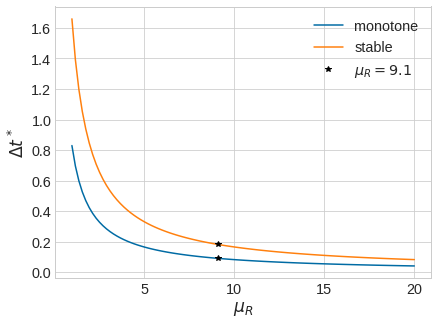

In [9]:
muR = np.linspace(1.0, 20, 100)
ratio = 0.21
muA = muR*ratio
rR = 1/(1-np.sqrt(ratio)/3)
a = muA/rA**2 - muR/rR**2
b = muA/rA - muR/rR
c = muA - muR
F = a*r0**2-2* b*r0+c
dtm = (r0-s)/(2*F)
dts = (r0-s)/(F)
plt.plot(muR, dtm, label='monotone')
plt.plot(muR, dts, label='stable')
muR = 9.1
ratio = 0.21
muA = muR*ratio
rR = 1/(1-np.sqrt(ratio)/3)
a = muA/rA**2 - muR/rR**2
b = muA/rA - muR/rR
c = muA - muR
F = a*r0**2-2*b*r0+c
plt.plot(9.1, (r0-s)/(2*F), '*', label='$\mu_R = 9.1$', color='black')
plt.plot(9.1, (r0-s)/(F), '*', color='black')
plt.legend()
plt.xlabel('$\mu_R$')
plt.ylabel('$\Delta t^*$')
plt.savefig('stability_bound_pwq_muR.pdf', bbox_inches='tight')

In [10]:
muR = 9.1
ratio = 0.21
muA = muR*ratio
rR = 1/(1-np.sqrt(ratio)/3)
a = muA/rA**2 - muR/rR**2
b = muA/rA - muR/rR
c = muA - muR
F = a*r0**2-2*b*r0+c
(r0-s)/(2*F)

0.09117218438490918

In [11]:
muR = 9.1
ratio = 0.21
muA = muR*ratio
rR = 1/(1-np.sqrt(ratio)/3)
a = muA/rA**2 - muR/rR**2
b = muA/rA - muR/rR
c = muA - muR
F = a*r0**2-2*b*r0+c
(r0-s)/(F)

0.18234436876981835

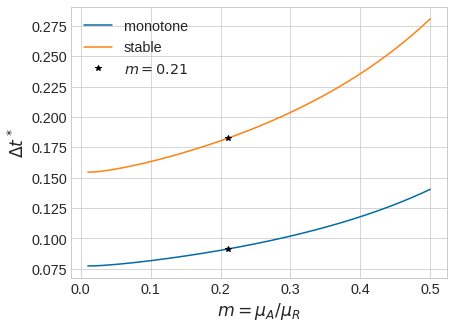

In [12]:
muR = 9.1
ratio = np.linspace(0.01, 0.5, 1000)
muA = muR*ratio
rR = 1/(1-np.sqrt(ratio)/3)
a = muA/rA**2 - muR/rR**2
b = muA/rA - muR/rR
c = muA - muR
F = a*r0**2-2*b*r0+c
dtm = (r0-s)/(2*F)
dts = (r0-s)/(F)
plt.plot(ratio, dtm, label='monotone')
plt.plot(ratio, dts, label='stable')
ratio = 0.21
muA = muR*ratio
rR = 1/(1-np.sqrt(ratio)/3)
a = muA/rA**2 - muR/rR**2
b = muA/rA - muR/rR
c = muA - muR
F = a*r0**2-2*b*r0+c
plt.plot(0.21, (r0-s)/(2*F), '*', label='$m = 0.21$', color='black')
plt.plot(0.21, (r0-s)/(F), '*',  color='black')

plt.legend()
plt.xlabel('$m = \mu_A/\mu_R$')
plt.ylabel('$\Delta t^*$')
plt.savefig('stability_bound_pwq_ratio.pdf', bbox_inches='tight')

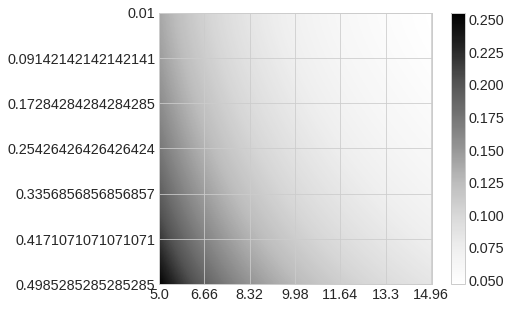

In [13]:
muR = np.linspace(5.0, 15, 1001)
ratio = np.linspace(0.01, 0.5, 1000)

def F(m, r):
    muA = m*r
    rR = 1/(1-np.sqrt(r)/3)

    a = muA/rA**2 - m/rR**2
    b = muA/rA - m/rR
    c = muA - m

    return a*r0**2-2*b*r0+c

X,Y = np.meshgrid(muR, ratio)

Z = (r0-s)/(2*F(X,Y))
im = plt.imshow(Z)

nx = muR.shape[0]
no_labels = 7 # how many labels to see on axis x
step_x = int(nx / (no_labels - 1)) # step between consecutive labels
x_positions = np.arange(0,nx,step_x) # pixel count at label position
x_labels = muR[::step_x] # labels you want to see
plt.xticks(x_positions, x_labels)

ny = ratio.shape[0]
no_labels = 7 # how many labels to see on axis x
step_y = int(ny / (no_labels - 1)) # step between consecutive labels
y_positions = np.arange(0,ny,step_y) # pixel count at label position
y_labels = ratio[::step_y] # labels you want to see
plt.yticks(y_positions, y_labels)


plt.colorbar(im)
plt.show()


#plt.plot(ratio, r0c1)
#plt.plot(ratio, r0c2)

## One figure with all three for mu and monotone bound

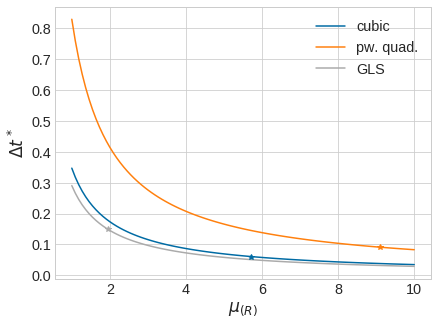

In [14]:
colors = 10*plt.rcParams['axes.prop_cycle'].by_key()['color']

mu = np.linspace(1.0, 10, 100)
mu_cubic=5.70
dtm_cubic = 1/(2*mu*(r0-rA)**2)

muR = 9.1
ratio = 0.21
muA = mu*ratio
rR = 1/(1-np.sqrt(ratio)/3)
a = muA/rA**2 - mu/rR**2
b = muA/rA - mu/rR
c = muA - mu
F = a*r0**2-2*b*r0+c
dtm_pwq = (r0-s)/(2*F)

mu_gls = 1.95
dtm_gls = (r0-s)/(2*mu*np.log(1+r0-s))

plt.plot(mu, dtm_cubic, label='cubic')


plt.plot(mu, dtm_pwq, label='pw. quad.')

plt.plot(mu, dtm_gls, label='GLS')

plt.plot(5.70, 1/(2*5.70*(r0-rA)**2), '*', color=colors[0])
muR = 9.1
ratio = 0.21
muA = muR*ratio
rR = 1/(1-np.sqrt(ratio)/3)
a = muA/rA**2 - muR/rR**2
b = muA/rA - muR/rR
c = muA - muR
F = a*r0**2-2*b*r0+c
plt.plot(9.1, (r0-s)/(2*F), '*', color=colors[1])

plt.plot(1.95, (r0-s)/(2*1.95*np.log(1+r0-s)), '*', color=colors[2])


#plt.plot(5.70, 1/(2*5.70*(r0-rA)**2), '*', label='$\mu=5.70$')
plt.legend()
plt.xlabel('$\mu_{(R)}$')
plt.ylabel('$\Delta t^*$')
plt.savefig('monotonicity_bound_all.pdf', bbox_inches='tight')

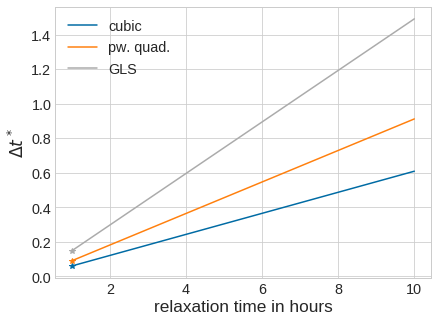

In [15]:
colors = 10*plt.rcParams['axes.prop_cycle'].by_key()['color']

tf = np.linspace(1.0, 10, 100)
mu_cubic=5.70
dtm_cubic = 1/(2*mu_cubic/tf*(r0-rA)**2)

muR = 9.1
ratio = 0.21
muA = muR/tf*ratio
rR = 1/(1-np.sqrt(ratio)/3)
a = muA/rA**2 - muR/tf/rR**2
b = muA/rA - muR/tf/rR
c = muA - muR/tf
F = a*r0**2-2*b*r0+c
dtm_pwq = (r0-s)/(2*F)

mu_gls = 1.95
dtm_gls = (r0-s)/(2*mu_gls/tf*np.log(1+r0-s))

plt.plot(tf, dtm_cubic, label='cubic')


plt.plot(tf, dtm_pwq, label='pw. quad.')

plt.plot(tf, dtm_gls, label='GLS')

plt.plot(1.0, 1/(2*5.70*(r0-rA)**2), '*', color=colors[0])
muR = 9.1
ratio = 0.21
muA = muR*ratio
rR = 1/(1-np.sqrt(ratio)/3)
a = muA/rA**2 - muR/rR**2
b = muA/rA - muR/rR
c = muA - muR
F = a*r0**2-2*b*r0+c
plt.plot(1.0, (r0-s)/(2*F), '*', color=colors[1])

plt.plot(1.0, (r0-s)/(2*1.95*np.log(1+r0-s)), '*', color=colors[2])


#plt.plot(5.70, 1/(2*5.70*(r0-rA)**2), '*', label='$\mu=5.70$')
plt.legend()
plt.xlabel('relaxation time in hours')
plt.ylabel('$\Delta t^*$')
plt.savefig('monotonicity_bound_relaxation_time.pdf', bbox_inches='tight')